**Задание 1: Векторизация текста с использованием Мешка слов (BoW) и TF-IDF**

1. Создайте корпус из минимум 10 текстовых документов (можно взять новостные статьи, отзывы на товары, статьи по одной тематике).
2. Реализуйте предобработку текста, включающую:
* Приведение к нижнему регистру
* Токенизацию
* Удаление стоп-слов и пунктуации
* Лемматизацию/стемминг
3. Реализуйте модель Мешка слов (BoW) с использованием CountVectorizer из scikit-learn.
4. Реализуйте модель TF-IDF с использованием TfidfVectorizer из scikit-learn.
5. Найдите 10 самых значимых терминов для каждого документа по обоим подходам и сравните результаты.
6. Визуализируйте сходство документов с помощью метрики косинусного расстояния для обоих подходов.
7. Прокомментируйте разницу в результатах между BoW и TF-IDF

In [28]:
# 7. Ответ: разница между BoW и TF-IDF заключается в том, что BoW преобразует текстовые документы в числовые векторы, а TF-IDF используется для оценки важности слова
# в документе относительно других документов.

In [2]:
# ваш код
original_documents = ["""Police charge driver who allegedly killed a pedestrian while livestreaming on TikTok

            Local police said they have charged an Illinois driver who struck and killed a pedestrian while she was livestreaming on TikTok.

            The New York Times reports that Tynesha McCarty-Wroten, who posts to TikTok under the name Tea Tyme, has been charged by the Zion Police Department with two felonies —  reckless homicide and aggravated use of a communications device resulting in death.

            In a video that has been reshared by other accounts on TikTok, woman posting as Tea Tyme can reportedly be seen speaking into her phone when there’s a loud thud. An offscreen child asks, “What was that?” then the woman replies, “I hit somebody.”

            Surveillance videos reportedly showed McCarty-Wroten’s vehicle entering the intersection while the traffic light was still red, with investigators determining that she did not seem to slow down or change course before striking Darren Lucas, who was later pronounced dead at the hospital.

            McCarty-Wroten’s lawyer told the NYT that evidence will show that “what happened was an accident, was a negligent act, but was not an intentional or reckless act.”
            """,
            """You may soon be able to change your Gmail address

            Good news for anyone tired of or embarrassed by their current Gmail address: You may soon be able to change it without losing access to your old emails and fil         es.

            As first spotted by the Google Pixel Hub group on Telegram and subsequently reported in 9to5Google, a Hindi version of the Gmail support website states that Google is “gradually rolling out to all users” the ability to change the email address tied to their Google account, including changing from their current Gmail address to “to a new email address that ends in gmail.co          m.”

            If you make the switch, your old Gmail address should still work as an alias, and you’ll be able to sign into Google services with either your new or old address. However, you won’t be able to create any additional Gmail addresses tied to your account for another 12 mont         hs.

            As of Sunday afternoon, the English-language version of the support site still states, “If your account’s email address ends in @gmail.com, you usually can’t change it” and instead suggests changing the name associated with the address or signing up for a new address and then transferring emails and contacts over.
            """,
            """FaZe Clan’s future is uncertain after influencers depart

            Six influencers recently announced that they are leaving esports group FaZe Clan following unsuccessful contract negotiations with new management.

            Bloomberg reports that influencers known as Adapt, Jason, Ronaldo, Lacy, Rage, and Silky — the entire roster on the FaZe Clan website — all announced that they are leaving the group.

            Adapt wrote on X that he’d spent 14 years as part of FaZe Clan: “Over half of my life, I’d be lying if I said this didn’t hurt, but it had to be done.”

            Another FaZe Clan member who left in August had described the situation as one where the influencers felt they had “no control, and it’s like we’re puppets.”

            The influencers had reportedly been negotiating with Faze Clan investor HardScope and its CEO Matt Kalish for the past half year. Kalish plans to continue the group without the departed influencers.

            “My best guess is they’re all good kids and have a lot of people in their ear and are confused,” he told Bloomberg. He also claimed that the group’s current financial structure is “unsustainable.”

            FaZe Clan went public in 2022, but the company was acquired by GameSquare for $17 million the following year, and its CEO was fired.""",
            """Trump administration seeks to deport hate speech researcher previously sued by X

            A federal judge has temporarily blocked the Trump administration from arresting or deporting Imran Ahmed, CEO of the Center for Countering Digital Hate (CCDH).

            The New York Times reports that Ahmed is one of five researchers and regulators whose work around online abuse and disinformation drew the ire of the U.S. State Department, which declared this week that they are barred from the United States.

            Secretary of State Marco Rubio described the targeted individuals as “radical activists and weaponized NGOs” who have “led organized efforts to coerce American platforms to censor, demonetize, and suppress American viewpoints they oppose.”

            While Ahmed was born in the United Kingdom, he has a U.S. green card, resides in the United States, and has an American wife and child.

            Ahmed defended his work in an interview with PBS News, describing the government’s move as “another example of these companies [such as Meta, OpenAI, and Elon Musk’s X] which have tried to evade responsibility using their big money to try and influence things in politics.”

            A lawsuit by X against the CCDH was dismissed last year, but an appeal is pending.""",
            """Nvidia to license AI chip challenger Groq’s tech and hire its CEO

            Nvidia has struck a non-exclusive licensing agreement with AI chip competitor Groq. As part of the deal, Nvidia will hire Groq founder Jonathan Ross, president Sunny Madra, and other employees.

            CNBC reported that Nvidia is acquiring assets from Groq for $20 billion; Nvidia told TechCrunch that this is not an acquisition of the company and did not comment on the scope of the deal. But if CNBC’s numbers are accurate, this purchase is expected to be Nvidia’s largest ever, and with Groq on its side, Nvidia is poised to become even more dominant in chip manufacturing.

            As tech companies compete to grow their AI capabilities, they need computing power, and Nvidia’s GPUs have emerged as the industry standard. But Groq has been working on a different type of chip called an LPU (language processing unit), which it has claimed can run LLMs at 10 times faster and using one-tenth the energy. Groq’s CEO Jonathan Ross is known for this sort of innovation — when he worked for Google, he helped invent the TPU (tensor processing unit), a custom AI accelerator chip.

            In September, Groq raised $750 million at a $6.9 billion valuation. Its growth has been quick and significant — the company said that it powers the AI apps of more than 2 million developers, up from about 356,000 last year.

            Updated, 12/24/25 at 5:40 p.m. ET, with clarification from Nvidia about the nature of the deal.""",
            """There’s plenty of hype around AI and robots in healthcare, but the problem that’s actually costing hospitals money right now is operating room coordination. Two to four hours of OR time is lost every single day, not because of the surgeries themselves, but because of everything in between, from manual scheduling and coordination chaos to guesswork about room turnover.

            Today on TechCrunch’s Equity podcast, we’re bringing you a conversation that TechCrunch AI Editor Russell Brandom had with Conor McGinn, co-founder and CEO of Akara, the startup that recently landed a spot on Time’s Best Inventions of 2025 and is building what’s essentially air traffic control for hospitals using thermal sensors and AI.

            Listen to the full episode to hear:

            Why Akara pivoted from cleaning robots to ambient sensing, and how thermal sensors document surgeries without privacy concerns

            How NHS vetting became McGinn’s backdoor into U.S. hospitals

            The real bottleneck holding back medical robotics (spoiler: it’s not the robots, it’s the infrastructure)

            Why 40% of the nursing workforce could leave in the next five years, and what that means for automation""",
            """There’s plenty of hype around AI and robots in healthcare, but the problem that’s actually costing hospitals money right now is operating room coordination. Two to four hours of OR time is lost every single day, not because of the surgeries themselves, but because of everything in between from manual scheduling and coordination chaos to guesswork about room turnover.

            Today on TechCrunch’s Equity podcast, we’re bringing you a conversation that TechCrunch AI Editor Russell Brandom had with Conor McGinn, co-founder and CEO of Akara, the startup that recently landed a spot on Time’s Best Inventions of 2025 and is building what’s essentially air traffic control for hospitals using thermal sensors and AI.""",
            """ServiceNow to acquire cybersecurity startup Armis for $7.75B

            Enterprise software company ServiceNow agreed to acquire nine-year-old cybersecurity startup Armis for $7.75 billion in cash.

            The deal is a massive valuation jump for the company. Just last month, Armis raised a $435 million pre-IPO funding round, which valued the company at $6.1 billion.

            Armis co-founder and CEO Yevgeny Dibrov had told TechCrunch last month that the company aims to go public in late 2026 or 2027, adding that an IPO is his “personal dream.”

            Given the unpredictability of IPO markets and how few cybersecurity companies actually go public, it is not a surprise that Armis ultimately chose an M&A exit.

            According to ServiceNow, Armis has reached $340 million in annual recurring revenue (ARR), with year-over-year growth exceeding 50%.

            Armis, which provides security software for critical infrastructure to Fortune 500 companies and governments, will help ServiceNow expand its cybersecurity offerings.

            The deal caps off a busy acquisition year for ServiceNow, which scooped up Moveworks for $2.85 billion and agreed to acquire cybersecurity startup Veza for $1 billion.

            According to PitchBook, Armis has raised a total of $1.45 billion in venture capital from investors, including Sequoia, CapitalG, and Insight Partners.""",
            """John Carreyrou and other authors bring new lawsuit against six major AI companies

            A group of writers, including Theranos whistleblower and “Bad Blood” author John Carreyrou, is filing a lawsuit against Anthropic, Google, OpenAI, Meta, xAI, and Perplexity, accusing the companies of training their models on pirated copies of their books.

            If this sounds familiar, it’s because another set of authors already filed a class action suit against Anthropic for these same acts of copyright infringement. In that case, the judge ruled that it was legal for Anthropic and similar AI companies to train on pirated copies of books, but that it was not legal to pirate the books in the first place.

            While eligible writers can receive about $3,000 from the $1.5 billion Anthropic settlement, some authors were dissatisfied with that resolution — it doesn’t hold AI companies accountable for the actual act of using stolen books to train their models, which generate billions of dollars in revenue.

            According to the new lawsuit, the plaintiffs say that the proposed Anthropic settlement “seems to serve [the AI companies], not creators.”

            “LLM companies should not be able to so easily extinguish thousands upon thousands of high-value claims at bargain-basement rates, eliding what should be the true cost of their massive willful infringement,” the lawsuit says.""",
            """This week on StrictlyVC Download, Connie Loizos spoke with Colin Angle, the founder and former CEO of iRobot. From his living room into a household name, Angle spent 30 years turning iRobot into one of the most pioneering companies in the robotics industry, stepping down as CEO following the failed Amazon acquisition. In this conversation, he unpacks why he considers iRobot’s bankruptcy “avoidable and a tragedy,” what regulators got catastrophically wrong in blocking the $1.7 billion Amazon deal, and why the FTC’s office walls covered with “blocked deals” as trophies revealed a deeply misguided approach to protecting innovation.

            Angle also shares the brutal reality of fighting regulators for 18 months while producing over 100,000 documents, why nascent American tech industries keep getting handed to overseas competitors, and what he’s building next with his stealth startup, including his contrarian take on humanoid robots and why Rodney Brooks is “never factually wrong, but not necessarily answering the question you think he’s answering.”"""
]


In [3]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 76.7 MB/s eta 0:00:00


In [4]:
# Загрузка нужных библиотек
import string
import re
import nltk
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt_tab')

# Загрузка моделей spaCy
nlp_en = spacy.load("en_core_web_sm")

# Загрузка стоп-слов
nltk.download('stopwords')
russian_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
# Предобработка текста
def normalize_text(text):
    new_text = []
    for sentence in text:
        sentence = sentence.lower()
        sentence = re.sub(r'[^\w\s]', ' ', sentence)
        # Нужно убрать числа так как они часто попадались в BOW
        sentence = re.sub(r'[0-9]+', ' ', sentence)
        tokens = sentence.split()
        filtered_tokens = [token for token in tokens if token not in russian_stopwords]
        sentence = ' '.join(filtered_tokens)

        # Лемматизация
        doc = nlp_en(sentence)
        lemmas = [token.lemma_ for token in doc if token.is_alpha]
        sentence = ' '.join(lemmas)
        new_text.append(sentence)

    return new_text

documents = normalize_text(original_documents)

print("Предобработанные документы:")
for i, doc in enumerate(documents, 1):
    print(f"Документ {i}: {doc}")





# # Лемматизация английского текста
# english_lemmas_spacy = lemmatize_with_spacy(documents[0], nlp_en)
# print(english_lemmas_spacy)

Предобработанные документы:
Документ 1: police charge driver allegedly kill pedestrian livestreaming tiktok local police say charge illinois driver strike kill pedestrian livestreaming tiktok new york times report tynesha mccarty wroten post tiktok name tea tyme charge zion police department two felony reckless homicide aggravate use communication device result death video reshare account tiktok woman post tea tyme reportedly see speak phone loud thud offscreen child ask woman reply hit somebody surveillance video reportedly show mccarty wroten vehicle enter intersection traffic light still red investigator determine seem slow change course strike darren lucas later pronounce dead hospital mccarty wroten lawyer tell nyt evidence show happen accident negligent act intentional reckless act
Документ 2: may soon able change gmail address good news anyone tired embarrassed current gmail address may soon able change without lose access old email fil es first spot google pixel hub group teleg

In [6]:
from sklearn.feature_extraction.text import CountVectorizer  # Для создания Bag of Words

In [7]:
# Создание векторизатора
count_vectorizer = CountVectorizer()

# Обучение векторизатора и преобразование документов
bow_matrix = count_vectorizer.fit_transform(documents)

# Получение списка фичей (слов)
feature_names = count_vectorizer.get_feature_names_out()

# Преобразование разреженной матрицы в плотную для наглядности
bow_df = pd.DataFrame(
    bow_matrix.toarray(),
    columns=feature_names,
    index=[f'Документ {i+1}' for i in range(len(documents))]
)

# Вывод матрицы Bag of Words
print("Матрица Bag of Words:")
print(bow_df)

Матрица Bag of Words:
             ability  able  abuse  accelerator  access  accident  accord  \
Документ 1         0     0      0            0       0         1       0   
Документ 2         1     4      0            0       1         0       0   
Документ 3         0     0      0            0       0         0       0   
Документ 4         0     0      1            0       0         0       0   
Документ 5         0     0      0            1       0         0       0   
Документ 6         0     0      0            0       0         0       0   
Документ 7         0     0      0            0       0         0       0   
Документ 8         0     0      0            0       0         0       2   
Документ 9         0     1      0            0       0         0       1   
Документ 10        0     0      0            0       0         0       0   

             account  accountable  accurate  ...  workforce  write  writer  \
Документ 1         1            0         0  ...          0    

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer # Для создания TF-IDF

In [9]:
# Создание TF-IDF векторизатора
tfidf_vectorizer = TfidfVectorizer()

# Обучение векторизатора и преобразование документов
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Преобразование в DataFrame
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out(),
    index=[f'Документ {i+1}' for i in range(len(documents))]
)

# Вывод матрицы TF-IDF
print("Матрица TF-IDF:")
print(tfidf_df)

Матрица TF-IDF:
             ability      able     abuse  accelerator   access  accident  \
Документ 1   0.00000  0.000000  0.000000     0.000000  0.00000  0.079241   
Документ 2   0.05281  0.179572  0.000000     0.000000  0.05281  0.000000   
Документ 3   0.00000  0.000000  0.000000     0.000000  0.00000  0.000000   
Документ 4   0.00000  0.000000  0.085054     0.000000  0.00000  0.000000   
Документ 5   0.00000  0.000000  0.000000     0.057973  0.00000  0.000000   
Документ 6   0.00000  0.000000  0.000000     0.000000  0.00000  0.000000   
Документ 7   0.00000  0.000000  0.000000     0.000000  0.00000  0.000000   
Документ 8   0.00000  0.000000  0.000000     0.000000  0.00000  0.000000   
Документ 9   0.00000  0.060405  0.000000     0.000000  0.00000  0.000000   
Документ 10  0.00000  0.000000  0.000000     0.000000  0.00000  0.000000   

               accord   account  accountable  accurate  ...  workforce  \
Документ 1   0.000000  0.067362     0.000000  0.000000  ...    0.00000   

In [10]:
bow_sum = np.sum(bow_matrix.toarray(), axis=0)


word_bow_dict = dict(zip(feature_names, bow_sum))

top_bow_words = sorted(word_bow_dict.items(), key=lambda x: x[1], reverse=True)[:10]

print("=== Топ-10 слов по всей коллекции ===\n")
print("Топ-10 слов по BOW (самые частые в коллекции):")
for word, count in top_bow_words:
    print(f"- {word}: {count} раз")

tfidf_sum = np.sum(tfidf_matrix.toarray(), axis=0)

word_tfidf_dict = dict(zip(feature_names, tfidf_sum))

top_tfidf_words = sorted(word_tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nТоп-10 слов по TF-IDF (с наибольшим весом по всей коллекции):")
for word, score in top_tfidf_words:
    print(f"- {word}: {score:.4f}")

print("\nСравнение топ-10 слов:")
bow_words = [word for word, _ in top_bow_words]
tfidf_words = [word for word, _ in top_tfidf_words]

common_words = set(bow_words) & set(tfidf_words)
bow_only = set(bow_words) - common_words
tfidf_only = set(tfidf_words) - common_words

if common_words:
    print(f"Общие слова в обоих топ-10: {', '.join(common_words)}")
if bow_only:
    print(f"Только в BOW топ-10: {', '.join(bow_only)}")
if tfidf_only:
    print(f"Только в TF-IDF топ-10: {', '.join(tfidf_only)}")

=== Топ-10 слов по всей коллекции ===

Топ-10 слов по BOW (самые частые в коллекции):
- company: 18 раз
- ai: 15 раз
- address: 11 раз
- year: 11 раз
- billion: 10 раз
- ceo: 10 раз
- nvidia: 9 раз
- armis: 8 раз
- gmail: 8 раз
- groq: 8 раз

Топ-10 слов по TF-IDF (с наибольшим весом по всей коллекции):
- ai: 0.8648
- company: 0.6615
- address: 0.5809
- nvidia: 0.5218
- armis: 0.5136
- hospital: 0.4984
- groq: 0.4638
- clan: 0.4535
- faze: 0.4535
- billion: 0.4470

Сравнение топ-10 слов:
Общие слова в обоих топ-10: groq, nvidia, armis, company, address, billion, ai
Только в BOW топ-10: year, ceo, gmail
Только в TF-IDF топ-10: hospital, faze, clan


In [11]:
# Функция для предобработки текста
def preprocess_text(text):
    """Функция для базовой обработки текста"""
    # Преобразуем в нижний регистр
    text = text.lower()

    # Удаляем пунктуацию (оставляем только буквы и пробелы)
    text = re.sub(r'[^\w\s]', '', text)

    # Токенизация (разбиение на слова)
    tokens = word_tokenize(text)

    return tokens

# Предобрабатываем каждое предложение в корпусе
processed_corpus = [preprocess_text(sentence) for sentence in bow_words]

In [12]:
model = Word2Vec(
    sentences=processed_corpus,  # Наш корпус предложений
    vector_size=100,  # Размерность векторов (обычно от 100 до 300)
    window=5,  # Размер контекстного окна (сколько слов слева и справа учитывать)
    min_count=1,  # Минимальная частота слова для включения в модель (здесь 1, т.к. у нас маленький корпус)
    sg=1,  # 1 = Skip-gram, 0 = CBOW
    hs=0,  # 0 = использовать negative sampling, 1 = иерархический softmax
    negative=5,  # Количество "негативных" семплов для negative sampling
    ns_exponent=0.75,  # Экспонента для отрицательного сэмплирования
    cbow_mean=1,  # Для CBOW: 1 = использовать среднее, 0 = сумму
    alpha=0.025,  # Начальная скорость обучения
    min_alpha=0.0001,  # Минимальная скорость обучения
    seed=42,  # Для воспроизводимости результатов
    workers=4,  # Количество потоков для параллельного обучения
)

In [282]:
def sentence_to_vector(sentence, model):
    """
    Преобразует предложение в вектор, усредняя векторы слов

    Args:
        sentence: Исходное предложение
        model: Word2Vec

    Returns:
        Вектор предложения
    """
    # Предобрабатываем предложение
    words = preprocess_text(sentence)

    # Отбираем только слова, которые есть в модели
    words = [word for word in words if word in model.wv]

    if not words:
        # Если не нашлось ни одного известного слова, вернем нулевой вектор
        return np.zeros(model.vector_size)

    # Получаем векторы слов
    word_vectors = [model.wv[word] for word in words]

    # Возвращаем средний вектор
    return np.mean(word_vectors, axis=0)

# Создаем векторные представления для всех предложений корпуса
sentence_vectors = [sentence_to_vector(sentence, model) for sentence in documents]

def find_similar_sentences(query, corpus, model, top_n=10):
    """
    Находит предложения, наиболее похожие на запрос

    Args:
        query: Запрос (строка)
        corpus: Список предложений для поиска
        model: Модель Word2Vec
        top_n: Количество результатов для вывода

    Returns:
        Список кортежей (предложение, оценка сходства)
    """
    # Преобразуем запрос в вектор
    query_vector = sentence_to_vector(query, model)
    query_norm = np.linalg.norm(query_vector)
    if query_norm == 0:
    # В запросе не оказалось слов из словаря модели
        return []

    similarities = []
    for i, sentence_vector in enumerate(sentence_vectors):
        denom = query_norm * np.linalg.norm(sentence_vector)
        if denom == 0:
            similarity = 0.0
        else:
            similarity = float(np.dot(query_vector, sentence_vector) / denom)

        similarities.append((documents[i], similarity))

    # Сортируем по убыванию сходства
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Возвращаем top_n результатов
    return similarities[:top_n]

print("\n=== Поиск похожих предложений ===")
for query in original_documents:
    # Чтобы запрос не был слишком громозким
    tokens = query.split()
    query = " ".join(tokens)
    print(f"\nЗапрос: {query}")
    similar = find_similar_sentences(query, documents, model)
    for i, (sentence, score) in enumerate(similar, 1):
        print(f"{i}. {sentence[:20]} (сходство: {score:.4f})")


=== Поиск похожих предложений ===

Запрос: Police charge driver who allegedly killed a pedestrian while livestreaming on TikTok Local police said they have charged an Illinois driver who struck and killed a pedestrian while she was livestreaming on TikTok. The New York Times reports that Tynesha McCarty-Wroten, who posts to TikTok under the name Tea Tyme, has been charged by the Zion Police Department with two felonies — reckless homicide and aggravated use of a communications device resulting in death. In a video that has been reshared by other accounts on TikTok, woman posting as Tea Tyme can reportedly be seen speaking into her phone when there’s a loud thud. An offscreen child asks, “What was that?” then the woman replies, “I hit somebody.” Surveillance videos reportedly showed McCarty-Wroten’s vehicle entering the intersection while the traffic light was still red, with investigators determining that she did not seem to slow down or change course before striking Darren Lucas, who

In [14]:
docs_clean = [" ".join(preprocess_text(d)) for d in documents]
labels = [f"Док {i+1}" for i in range(len(docs_clean))]

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

bow = CountVectorizer()
X_bow = bow.fit_transform(docs_clean)

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(docs_clean)

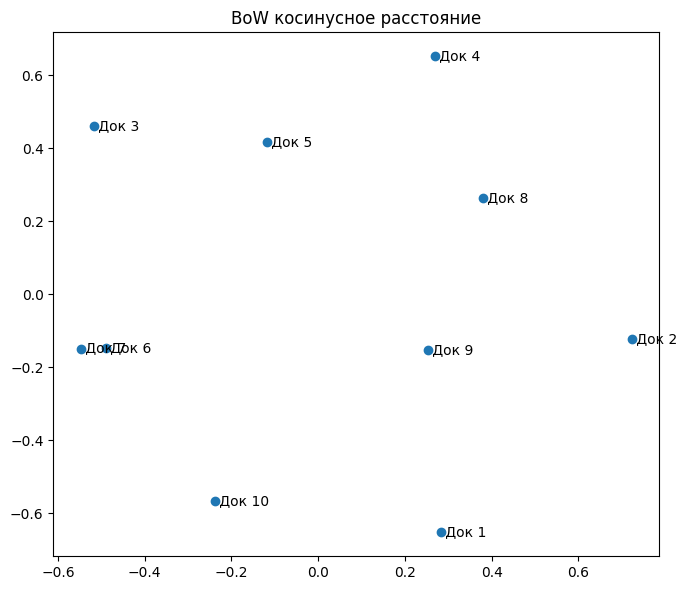

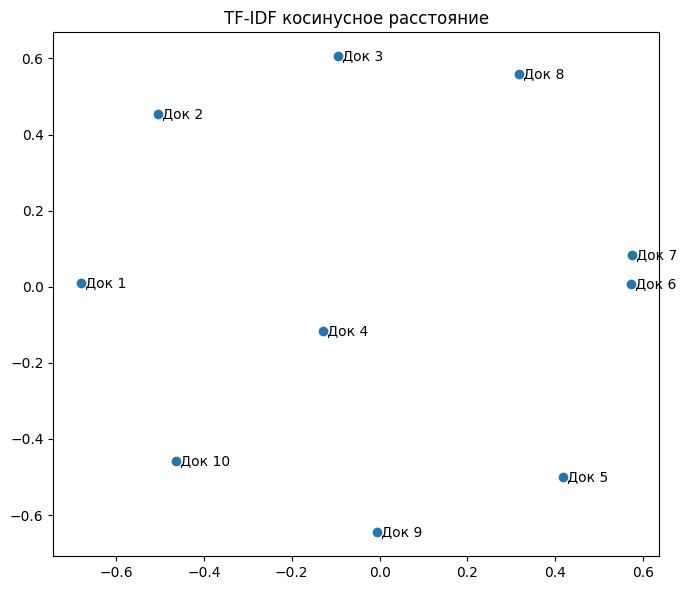

In [16]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_distances

def plot_mds(X, labels, title):
    D = cosine_distances(X)
    coords = MDS(n_components=2, dissimilarity="precomputed", random_state=42).fit_transform(D)

    plt.figure(figsize=(7,6))
    plt.scatter(coords[:,0], coords[:,1])
    for i, lab in enumerate(labels):
        plt.text(coords[i,0], coords[i,1], " " + lab, va="center")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_mds(X_bow, labels, "BoW косинусное расстояние")
plot_mds(X_tfidf, labels, "TF-IDF косинусное расстояние")


**Задание 2: Морфологическая разметка текста**

1. Возьмите отрывок текста (минимум 300 слов) на русском и английском языке.
2. Для русского языка используйте PyMorphy2 или PyMorphy3, для английского - NLTK или SpaCy для проведения морфологического анализа.
3. Выполните следующие операции:
* Определите части речи для каждого слова в тексте
* Для существительных определите падеж, род и число
* Для глаголов определите время, лицо и число
* Создайте частотный словарь частей речи в тексте
4. Разработайте функцию, которая будет автоматически изменять текст, заменяя все существительные на их форму множественного числа (где возможно).
5. Результаты морфологического анализа должны быть представлены в виде таблицы.
6. Оцените и прокомментируйте точность определения морфологических характеристик

**Ответ:** морфологические характеристики NLTK и Pymorphy3 определили довольно точно (В Pymorphy3 всего 2 UKNOWN см. таблицу). С NLTK трудность заключалось в том, как убрать пунктуацию, но хорошо когда есть теги, которые сразу показывают всю информацию о слове (вид, число, падеж). В Pymorphy3 конечно есть больше свободы, то есть, можно выбрать 1) что именно показывать 2) и для каких слов

In [18]:
# 6. **Ответ:** морфологические характеристики NLTK и Pymorphy3 определили довольно точно (В Pymorphy3 всего 2 UKNOWN см. таблицу). С NLTK трудность заключалось в том, как убрать пунктуацию, но хорошо когда есть теги, которые сразу показывают всю информацию о слове (вид, число, падеж). В Pymorphy3 конечно есть больше свободы, то есть, можно выбрать 1) что именно показывать 2) и для каких слов

In [19]:
# ваш код
english_text = """For the last few years, I wore either an analog watch or Xiaomi Band 6 for basic step tracking and time. I didn’t opt for an Apple Watch because I wasn’t constantly active, I didn’t feel the need to check my notifications, and I didn’t want to think about charging the watch every day.

                This year, I got a chance to test the new Google Pixel Watch 4, which made me feel like I might start wearing smartwatches again.

                I have always had a soft spot for circular watches. One of the first smartwatches I owned was the Moto 360, and I loved its rounded design.

                The Pixel Watch 4 has a curved domed Actua 360 display with thinner bezels as compared to last year’s watch. I have the 41 mm watch as the test unit, but I would personally opt for the 45mm size for battery and a bigger display. The display is also brighter with 3,000 nits of peak brightness, and that makes it easier to use in daylight.

                The battery life is great on the Pixel Watch 4, even with the smaller size. I have managed to get more than a day’s use out of the watch on those days when I have lighter activities.
                Image Credits: Ivan Mehta

                Though the Pixel Watch 4 has a proprietary charger where you can place the watch on the cradle like a puck, the charging speed makes up for it.

                Google advertises that you can charge this watch from 0% to 50% in 15 minutes and from 0% to 100% in 45 minutes. While the real-life timing doesn’t exactly match these numbers, I saw charging times that came close to these figures. The advantage of this rapid charging is that you can always put your watch to charge when you are making a coffee or doing a quick chore within the house, and get enough juice to last you throughout the day.
                Join the Disrupt 2026 Waitlist
                Add yourself to the Disrupt 2026 waitlist to be first in line when Early Bird tickets drop. Past Disrupts have brought Google Cloud, Netflix, Microsoft, Box, Phia, a16z, ElevenLabs, Wayve, Hugging Face, Elad Gil, and Vinod Khosla to the stages — part of 250+ industry leaders driving 200+ sessions built to fuel your growth and sharpen your edge. Plus, meet the hundreds of startups innovating across every sector.
                San Francisco | October 13-15, 2026
                WAITLIST NOW
                Fitness and software

                I largely used the Google Pixel Watch 4 to track my pickleball sessions and walking. Apart from calorie burns, there were no particular insights into sports-related movement. For the last 15 days, I started going to a gym, and apart from the treadmill and elliptical mode, there aren’t any specialized modes for particular gym equipment. Instead, you have to select from options for things like core training, weights, or a general workout mode, based on the workout you are doing.

                The watch does have more features for someone who runs — but that’s not possible in Delhi weather with terrible AQI right now. It also detects cardio workouts after 15 minutes of continuous activities, but while walking, these have been hit or miss for me. Another measure that has been off for me has been floor count. On days, I’ve walked to a cafe, I’ve seen a very high count for that, and on days I have gone up to my terrace multiple times, the number of floors climbed is incorrect.

                I am not someone who used to wear my watch or band to sleep. With the Pixel Watch 4, I had to mentally train myself to keep the watch on so I could get a better understanding of sleep and readiness scores. After a few weeks of usage, I regularly wore my watch to sleep. However, you don’t get additional or actionable insights related to sleep or readiness score on the watch in the daily summary. You do get suggestions on the Fitbit app related to readiness, but that’s about it. With fitness apps adding more AI to their apps, Google needs to step up its game.
                Image Credits: Screenshot by Techcrunch

                Google’s new Material UI design for the watch is refreshing and matches the theme on my Pixel Fold. The weather app is very nice to look at for both hourly and day forecasts. My one gripe is that I wish the exercise app allowed for more than three kinds of workouts to be available through quick start. I could raise my watch to talk to Gemini, which is neat, but beyond starting timers, asking for occasional sports updates, and starting a workout, I have not needed Gemini to be ever-present for me.

                I have been a fan of the recent Pixel Watch 4 update that lets me use the pinch gesture to dismiss notifications, play or pause videos or music, or even move my wrist to dismiss calls.

                The gripes I had about the watch didn’t bother me in daily usage. The display is fantastic, the software and fitness experience overall are great, and the display, along with the new design, is an upgrade from the last generation. However, the thing that drew me the most to the watch and made me stick to it is the combo of battery life and fast charging.

                All in all, the Pixel Watch 4 is one of the best Android smartwatches around."""
russian_text = """Была чудная ночь, такая ночь, которая разве только и может быть тогда, когда мы молоды, любезный читатель. Небо было такое звездное, такое светлое небо, что взглянув на него, невольно нужно было спросить себя неужели же могут жить под таким небом разные сердитые и капризные люди? Это тоже молодой вопрос, любезный читатель, очень молодой, но пошли его вам господь чаще на душу!.. Говоря о капризных и разных сердитых господах, я не мог не припомнить и своего благонравного поведения во весь этот день. С самого утра меня стала мучить какая-то удивительная тоска. Мне вдруг показалось, что меня, одинокого, все покидают и что все от меня отступаются. Оно, конечно, всякий вправе спросить: кто же эти все? потому что вот уже восемь лет, как я живу в Петербурге, и почти ни одного знакомства не умел завести Но к чему мне знакомства? Мне и без того знаком весь Петербург; вот почему мне и показалось, что меня все покидают, когда весь Петербург поднялся и вдруг уехал на дачу. Мне страшно стало оставаться одному, и целых три дня я бродил по городу в глубокой тоске, решительно не понимая, что со мной делается. Пойду ли на Невский, пойду ли в сад, брожу ли по набережной — ни одного лица из тех, кого привык встречать в том же месте, в известный час целый год. Они, конечно, не знают меня, да я-то их знаю. Я коротко их знаю; я почти изучил их физиономии — и любуюсь на них, когда они веселы, и хандрю, когда они затуманятся. Я почти свел дружбу с одним старичком, которого встречаю каждый божий день, в известный час, на Фонтанке. Физиономия такая важная, задумчивая; всё шепчет под нос и махает левой рукой, а в правой у него длинная сучковатая трость с золотым набалдашником. Даже он заметил меня и принимает во мне душевное участие. Случись, что я не буду в известный час на том же месте Фонтанки, я уверен, что на него нападет хандра. Вот отчего мы иногда чуть не кланяемся друг с другом, особенно когда оба в хорошем расположении духа. Намедни, когда мы не видались целые два дня и на третий день встретились, мы уже было и схватились за шляпы, да благо опомнились вовремя, опустили руки и с участием прошли друг подле друга. Мне тоже и дома знакомы. Когда я иду, каждый как будто забегает вперед меня на улицу, глядит на меня во все окна и чуть не говорит: «Здравствуйте; как ваше здоровье? и я, слава богу, здоров, а ко мне в мае месяце прибавят этаж». Или: «Как ваше здоровье? а меня завтра в починку». Или: «Я чуть не сгорел и притом испугался» и т. д. Из них у меня есть любимцы, есть короткие приятели; один из них намерен лечиться это лето у архитектора. Нарочно буду заходить каждый день, чтоб не залечили как-нибудь, сохрани его господи!.. Но никогда не забуду истории с одним прехорошеньким светло-розовым домиком. Это был такой миленький каменный домик, так приветливо смотрел на меня, так горделиво смотрел на своих неуклюжих соседей, что мое сердце радовалось, когда мне случалось проходить мимо. Вдруг, на прошлой неделе, я прохожу по улице и, как посмотрел на приятеля — слышу жалобный крик: «А меня красят в желтую краску!» Злодеи! варвары! они не пощадили ничего: ни колонн, ни карнизов, и мой приятель пожелтел, как канарейка. У меня чуть не разлилась желчь по этому случаю, и я еще до сих пор не в силах был повидаться с изуродованным моим бедняком, которого раскрасили под Цвет поднебесной империи.
                Итак, вы понимаете, читатель, каким образом я знаком со всем Петербургом.
                Я уже сказал, что меня целые три дня мучило беспокойство, покамест я догадался о причине его. И на улице мне было худо (того нет, этого нет, куда делся такой-то?) — да и дома я был сам не свой. Два вечера добивался я: чего недостает мне в моем углу? отчего так неловко было в нем оставаться? — и с недоумением осматривал я свои зеленые закоптелые стены, потолок, завешанный паутиной, которую с большим успехом разводила Матрена, пересматривал всю свою мебель, осматривал каждый стул, думая, не тут ли беда? (потому что коль у меня хоть один стул стоит не так, как вчера стоял, так я сам не свой) смотрел за окно, и всё понапрасну... нисколько не было легче! Я даже вздумал было призвать Матрену и тут же сделал ей отеческий выговор за паутину и вообще за неряшество; но она только посмотрела на меня в удивлении и пошла прочь, не ответив ни слова, так что паутина еще до сих пор благополучно висит на месте. Наконец я только сегодня поутру догадался, в чем дело. Э! да веды они от меня удирают на дачу! Простите за тривиальное словцо, но мне было не до высокого слога... потому что ведь всё, что только ни было в Петербурге, или переехало, или переезжало на дачу; потому что каждый почтенный господин солидной наружности, нанимавший извозчика, на глаза мои, тотчас же обращался в почтенного отца семейства, который после обыденных должностных занятий отправляется налегке в недра своей фамилии, на дачу потому что у каждого прохожего был теперь уже совершенно особый вид, который чуть-чуть не говорил всяком встречному: «Мы, господа, здесь только так, мимоходом, а вот через два часа мы уедем на дачу». Отворялось ли окно, по которому побарабанили сначала тоненькие, белые как сахар пальчики, и высовывалась головка хорошенькой девушки, подзывавшей разносчика с горшками цветов, — мне тотчас же, тут же представлялось, что эти цветы только так покупаются, то есть вовсе не для того, чтоб наслаждаться весной и цветами в душной городской квартире, а что вот очень скоро все переедут на дачу и цветы с собою увезут. Мало того, я уже сделал такие успех в своем новом, особенном роде открытий, что уже мог безошибочно, по одному виду, обозначить, на какой кто даче живет. Обитатели Каменного и Аптекарского островов или Петергофской дороги отличались изученным изяществом приемов, щегольскими летними костюмами и прекрасными экипажами, в которых они приехали в гор Жители Парголова и там, где подальше, с первого взгляда «внушали» своим благоразумием и солидностью; посетитель Крестовского острова отличался невозмутимо-веселым видом. Удавалось ли мне встретить длинную процессию ломовых извозчиков, лениво шедших с возжами в руках подле возов, нагруженных целыми горами всякой мебели, столов, стульев, диванов турецких и нетурецких и прочим домашним скарбом, на котором, сверх всего этого, зачастую восседала, на самой вершине воза, щедушная кухарка, берегущая барское добро как зеницу ока; смотрел ли я на тяжело нагруженные домашнею утварью лодки, скользившие по Неве иль Фонтанке, до Черной речки иль островов, — воза и лодки удесятерялись, усотерялись в глазах моих; казалось, всё поднялось и поехало, всё переселялось целыми караванами на дачу; казалось, весь Петербург грозил обратиться в пустыню, так что наконец мне стало стыдно, обидно и грустно: мне решительно некуда и незачем было ехать на дачу. Я готов был уйти с каждым возом, уехать с каждым господином почтенной наружности, нанимавшим извозчика; но ни один, решительно никто не пригласил меня; словно забыли меня, словно я для них был и в самом деле чужой!
                Я ходил много и долго, так что уже совсем успел, по своему обыкновению; забыть, где я, как вдруг очутился у заставы. Вмиг мне стало весело, и я шагнул за шлагбаум, пошел между засеянных полей и лугов, не слышал усталости, но чувствовал только всем составом своим, что какое-то бремя спадает с души моей. Все проезжие смотрели на меня так приветливо, что решительно чуть не кланялись; все были так рады чему-то, все до одного курили сигары. И я был рад, как еще никогда со мной не случалось. Точно я вдруг очутился в Италии, — так сильно поразила природа меня, полубольного горожанина, чуть не задохнувшегося в городских стенах."""

In [20]:
!pip install nltk spacy pymorphy3
!pip install inflect

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter
from nltk.tokenize.treebank import TreebankWordDetokenizer
import nltk
import string
import pymorphy3
import inflect

nltk.download('universal_tagset')
nltk.download('averaged_perceptron_tagger_eng')

import spacy
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 14.2 MB/s eta 0:00:00


[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [21]:
# Распределить на части речи ENG
text_tok = word_tokenize(english_text)
tagged = nltk.pos_tag(text_tok)
list_of_tagged = []

for elem in tagged:
    tag_tog = '_'.join(elem)
    list_of_tagged.append(tag_tog)

# Тут также определено число существительных (род, число, лицо у глаголов), так как в NLTK автоматически
# NN, NNP - единственное число, NNS, NNPS - множественное число
# VBZ - 3 лицо, ед. ч., настоящее время, VBN - прошедшее время и тд.
print(list_of_tagged)

['For_IN', 'the_DT', 'last_JJ', 'few_JJ', 'years_NNS', ',_,', 'I_PRP', 'wore_VBP', 'either_DT', 'an_DT', 'analog_NN', 'watch_NN', 'or_CC', 'Xiaomi_NNP', 'Band_NNP', '6_CD', 'for_IN', 'basic_JJ', 'step_NN', 'tracking_VBG', 'and_CC', 'time_NN', '._.', 'I_PRP', 'didn_VBP', '’_JJ', 't_NN', 'opt_NN', 'for_IN', 'an_DT', 'Apple_NNP', 'Watch_NNP', 'because_IN', 'I_PRP', 'wasn_VBP', '’_JJ', 't_NN', 'constantly_RB', 'active_JJ', ',_,', 'I_PRP', 'didn_VBP', '’_JJ', 't_NN', 'feel_VB', 'the_DT', 'need_NN', 'to_TO', 'check_VB', 'my_PRP$', 'notifications_NNS', ',_,', 'and_CC', 'I_PRP', 'didn_VBP', '’_JJ', 't_NN', 'want_VBP', 'to_TO', 'think_VB', 'about_IN', 'charging_VBG', 'the_DT', 'watch_NN', 'every_DT', 'day_NN', '._.', 'This_DT', 'year_NN', ',_,', 'I_PRP', 'got_VBD', 'a_DT', 'chance_NN', 'to_TO', 'test_VB', 'the_DT', 'new_JJ', 'Google_NNP', 'Pixel_NNP', 'Watch_NNP', '4_CD', ',_,', 'which_WDT', 'made_VBD', 'me_PRP', 'feel_VB', 'like_IN', 'I_PRP', 'might_MD', 'start_VB', 'wearing_VBG', 'smartwatche

In [22]:
# Распределить на части речи RUS
morph = pymorphy3.MorphAnalyzer()
text_tok = word_tokenize(russian_text)
rus_list_of_tagged = []

for word in text_tok:
    parses = morph.parse(word)
    best_parse = parses[0]
    pos = best_parse.tag.POS
    _case = best_parse.tag.case
    gender = best_parse.tag.gender
    number = best_parse.tag.number
    person = best_parse.tag.person
    tense = best_parse.tag.tense
    if pos == 'NOUN':
        rus_list_of_tagged.append(f'{word}_{pos}_{_case}_{gender}_{number}')
    elif pos == 'VERB':
        rus_list_of_tagged.append(f'{word}_{pos}_{person}_{tense}_{number}')
    else:
        rus_list_of_tagged.append(f'{word}_{pos}')

print(rus_list_of_tagged)

['Была_VERB_None_past_sing', 'чудная_ADJF', 'ночь_NOUN_accs_femn_sing', ',_None', 'такая_ADJF', 'ночь_NOUN_accs_femn_sing', ',_None', 'которая_ADJF', 'разве_PRCL', 'только_ADVB', 'и_CONJ', 'может_VERB_3per_pres_sing', 'быть_INFN', 'тогда_ADVB', ',_None', 'когда_CONJ', 'мы_NPRO', 'молоды_ADJS', ',_None', 'любезный_ADJF', 'читатель_NOUN_nomn_masc_sing', '._None', 'Небо_NOUN_nomn_neut_sing', 'было_VERB_None_past_sing', 'такое_ADJF', 'звездное_ADJF', ',_None', 'такое_ADJF', 'светлое_ADJF', 'небо_NOUN_nomn_neut_sing', ',_None', 'что_CONJ', 'взглянув_GRND', 'на_PREP', 'него_NPRO', ',_None', 'невольно_ADVB', 'нужно_PRED', 'было_VERB_None_past_sing', 'спросить_INFN', 'себя_NPRO', 'неужели_PRCL', 'же_PRCL', 'могут_VERB_3per_pres_plur', 'жить_INFN', 'под_PREP', 'таким_ADJF', 'небом_NOUN_ablt_neut_sing', 'разные_ADJF', 'сердитые_ADJF', 'и_CONJ', 'капризные_ADJF', 'люди_NOUN_nomn_masc_plur', '?_None', 'Это_PRCL', 'тоже_PRCL', 'молодой_ADJF', 'вопрос_NOUN_nomn_masc_sing', ',_None', 'любезный_ADJF',

In [23]:
# Словарь частей речи ENG
tokens = word_tokenize(english_text)
tokens = [t for t in tokens if re.search(r"[A-Za-z0-9]", t)]
tagged = pos_tag(tokens)
pos_counts = Counter(tag for _, tag in tagged)

print(pos_counts.most_common())

[('NN', 139), ('IN', 99), ('DT', 94), ('NNP', 73), ('JJ', 61), ('PRP', 53), ('NNS', 50), ('VB', 41), ('CC', 38), ('TO', 38), ('CD', 31), ('VBP', 30), ('VBZ', 29), ('RB', 28), ('VBD', 21), ('VBG', 19), ('VBN', 17), ('PRP$', 14), ('MD', 7), ('JJR', 7), ('WDT', 6), ('WRB', 4), ('RP', 3), ('EX', 2), ('WP', 2), ('RBR', 1), ('RBS', 1), ('PDT', 1), ('JJS', 1)]


In [24]:
# Словарь частей речи RUS
pos_counts = Counter()

for word in text_tok:

    if all(not ch.isalnum() and ch not in "ёЁ" for ch in word):
        continue
    parse = morph.parse(word)[0]
    pos = parse.tag.POS or "UNKN"
    pos_counts[pos] += 1

print(pos_counts.most_common())

[('NOUN', 245), ('ADJF', 176), ('VERB', 158), ('CONJ', 145), ('PREP', 131), ('NPRO', 114), ('ADVB', 105), ('PRCL', 78), ('INFN', 26), ('PRTF', 13), ('ADJS', 9), ('NUMR', 8), ('PRED', 6), ('GRND', 5), ('COMP', 3), ('INTJ', 2), ('UNKN', 2)]


In [25]:
#  Функция которая меняет ед. сущ. на мн. сущ. ENG
p = inflect.engine()
nlp = spacy.load("en_core_web_sm")

def pluralize_nouns_spacy(text: str) -> str:
    doc = nlp(text)
    out = []

    for tok in doc:
        # NN/NNP = обычно единственное число (NNS/NNPS = уже множественное)
        if tok.tag_ in ("NN", "NNP"):
            pl = p.plural_noun(tok.text) or p.plural(tok.text)

            # сохранение регистра
            if tok.text.isupper():
                pl = pl.upper()
            elif tok.text.istitle():
                pl = pl.title()

            out.append(pl + tok.whitespace_)
        else:
            out.append(tok.text_with_ws)

    return "".join(out)

print(pluralize_nouns_spacy(english_text))



For the last few years, I wore either an analogs watches or Xiaomis Bands 6 for basic steps trackings and times. I didn’t opt for an Apples Watches because I wasn’t constantly active, I didn’t feel the needs to check my notifications, and I didn’t want to think about charging the watches every days.

                This years, I got a chances to test the new Googles Pixels Watches 4, which made me feel like I might start wearing smartwatches again.

                I have always had a soft spots for circular watches. One of the first smartwatches I owned was the Motoes 360, and I loved its rounded designs.

                The Pixels Watches 4 has a curved domed Actuas 360 displays with thinner bezels as compared to last years’s watches. I have the 41 mms watches as the tests units, but I would personally opt for the 45mms sizes for batteries and a bigger displays. The displays is also brighter with 3,000 nits of peaks brightnesses, and that makes it easier to use in daylights.

     

In [31]:
#  Функция которая меняет ед. сущ. на мн. сущ. RUS
detok = TreebankWordDetokenizer()
def pluralize_nouns_pymorphy() -> str:

    tokens = word_tokenize(russian_text)
    new_tokens = []

    for w in tokens:
        if any(ch.isalpha() for ch in w):
            p = morph.parse(w)[0]
            if p.tag.POS == "NOUN" and p.tag.number == "sing":
                gramm = {"plur"}
                if p.tag.case:
                    gramm.add(p.tag.case)
                if p.tag.animacy:
                    gramm.add(p.tag.animacy)

                inf = p.inflect(gramm)
                if inf:
                    w = inf.word
        new_tokens.append(w)
    return new_tokens

new_text = detok.detokenize(pluralize_nouns_pymorphy())
print(new_text)


Была чудная ночи, такая ночи, которая разве только и может быть тогда, когда мы молоды, любезный читатели . небеса было такое звездное, такое светлое небеса, что взглянув на него, невольно нужно было спросить себя неужели же могут жить под таким небесами разные сердитые и капризные люди? Это тоже молодой вопросы, любезный читатели, очень молодой, но пошли его вам господь чаще на души! .. Говоря о капризных и разных сердитых господах, я не мог не припомнить и своего благонравного поведений во весь этот дни . С самого утр меня стала мучить какая-то удивительная тоска . Мне вдруг показалось, что меня, одинокого, все покидают и что все от меня отступаются . Оно, конечно, всякий вправе спросить: кто же эти все? потому что вот уже восемь лет, как я живу в петербургах, и почти ни одного знакомств не умел завести Но к чему мне знакомств? Мне и без того знаками весь петербурги; вот почему мне и показалось, что меня все покидают, когда весь петербурги поднялся и вдруг уехал на дачи . Мне страшно

In [30]:
# Таблица разметки ENG
eng_tokens = word_tokenize(english_text)
eng_tagged = nltk.pos_tag(eng_tokens)  # список (token, tag)

eng_df = pd.DataFrame(eng_tagged, columns=["token", "pos_tag"])


# Таблица разметки RUS
morph = pymorphy3.MorphAnalyzer()
rus_tokens = word_tokenize(russian_text)

rus_rows = []
for word in rus_tokens:
    if all(not ch.isalnum() and ch not in "ёЁ" for ch in word):
        continue

    p = morph.parse(word)[0]
    pos = p.tag.POS or "UNKN"

    row = {
        "token": word,
        "pos_tag": pos,
        "case": p.tag.case,
        "gender": p.tag.gender,
        "number": p.tag.number,
        "person": p.tag.person,
        "tense": p.tag.tense,
    }
    rus_rows.append(row)

rus_df = pd.DataFrame(rus_rows)



# 3) Таблицы частот POS
eng_tokens_np = [t for t in word_tokenize(english_text) if re.search(r"[A-Za-z0-9]", t)]
eng_pos_counts = Counter(tag for _, tag in pos_tag(eng_tokens_np))
eng_freq_df = pd.DataFrame(eng_pos_counts.most_common(), columns=["pos_tag", "count"])

rus_pos_counts = Counter()
for word in rus_tokens:
    if all(not ch.isalnum() and ch not in "ёЁ" for ch in word):
        continue
    pos = morph.parse(word)[0].tag.POS or "UNKN"
    rus_pos_counts[pos] += 1

rus_freq_df = pd.DataFrame(rus_pos_counts.most_common(), columns=["pos_tag", "count"])


# Таблицы
print("ENG tagged table:")
print(eng_df)

print("\nRUS tagged table:")
print(rus_df)

print("\nENG POS frequency:")
print(eng_freq_df)

print("\nRUS POS frequency:")
print(rus_freq_df)

ENG tagged table:
             token pos_tag
0              For      IN
1              the      DT
2             last      JJ
3              few      JJ
4            years     NNS
...            ...     ...
1025          best     JJS
1026       Android      JJ
1027  smartwatches     NNS
1028        around      IN
1029             .       .

[1030 rows x 2 columns]

RUS tagged table:
               token pos_tag  case gender number person tense
0               Была    VERB  None   femn   sing   None  past
1             чудная    ADJF  nomn   femn   sing   None  None
2               ночь    NOUN  accs   femn   sing   None  None
3              такая    ADJF  nomn   femn   sing   None  None
4               ночь    NOUN  accs   femn   sing   None  None
...              ...     ...   ...    ...    ...    ...   ...
1221              не    PRCL  None   None   None   None  None
1222  задохнувшегося    PRTF  gent   masc   sing   None  past
1223               в    PREP  None   None   None   None 

**Задание 3: Синтаксический анализ предложений**

1. Возьмите 2 простых и 3 сложных предложений на русском и английском языке (всего 10 предложений).
2. Используйте SpaCy для построения синтаксических деревьев этих предложений.
3. Для каждого предложения:
* Визуализируйте синтаксическое дерево
* Выделите все подлежащие и сказуемые
* Найдите все пары слов, связанные отношением определения (прилагательное-существительное)
4. Разработайте функцию для извлечения всех объектных и субъектных отношений из предложения в формате (субъект, предикат, объект).
5. Объясните, какие трудности возникают при синтаксическом анализе сложных предложений

Ответ: При синтаксическом анализе сложных предложений возникает множество трудностей. Стоит отметить, что инструмент spaCy хоть и является весьма хорошим и акутальным инструментов в наше время, не очень хорошо справляется с работой выделения подлежащего и сказуемого, а также других частей предложения. Конечно же проблема является в том, что в русском языке подлежащим может быть любая часть речи, а также у этого подлежащего может быть множетсво сказуемых. Из-за этого нужно добавлять множество правил, чтобы взять все подлежащие и сказуемые и даже в этом случае собрать их всех остается довольно затруднительным. В английском языке все также довольно не легко. Существуют те же проблемы, что и в русском, но также при попытке вывести отношения в формате (субъект, предикат, объект), учитывать также предлоги и артикли очень трудно без дополнительных функций или условий.

In [46]:
!python -m spacy download ru_core_news_md
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 MB 12.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 45.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [185]:
# ваш код
english_sentences = [
    "I like hot coffee.",
    "She reads every day.",
    "Although it was raining, we went for a walk because we needed fresh air.",
    "If you finish your work early, you can join us, but please let me know first.",
    "I was tired, so I went to bed, and I set an alarm so that I wouldn’t be late."
]

russian_sentences = [
    "Я люблю музыку.",
    "Мы дома.",
    "Когда потемнело, мы выключили яркий свет и тихо вышли на улицу.",
    "Если будет тепло, мы поедем за город, потому что всем хочется отдохнуть.",
    "Я хотел позвонить тебе, но забыл номер, поэтому написал короткое сообщение."
]


In [48]:
# Загрузка языковых моделей
nlp_ru = spacy.load("ru_core_news_md")
nlp_en = spacy.load("en_core_web_md")

In [104]:
from spacy import displacy

In [142]:
# Визуализация дерева зависимостей для русского языка
for sentence in russian_sentences:
    doc_ru = nlp_ru(sentence)

    print(f"Sentence {russian_sentences.index(sentence)}")
    displacy.render(doc_ru, style="dep", jupyter=True, options={"distance": 100, "compact": True})

Sentence 0


Sentence 1


Sentence 2


Sentence 3


Sentence 4


In [143]:
# Визуализация дерева зависимостей для английского языка
for sentence in english_sentences:
    doc_en = nlp_en(sentence)

    print(f"Sentence {english_sentences.index(sentence)}")
    displacy.render(doc_en, style="dep", jupyter=True, options={"distance": 100, "compact": True})

Sentence 0


Sentence 1


Sentence 2


Sentence 3


Sentence 4


In [105]:
def find_subj_and_pred_eng(doc):
    subj = []
    pred_tokens = []
    root = None

    # Находим корень
    for token in doc:
        if token.dep_ == "ROOT":
            root = token
            pred_tokens.append(token)
            break

    if not root:
        return [], []

    # Находим все компоненты составного сказуемого
    for token in doc:
        if token.dep_ in ["aux", "auxpass"] and token.head in [root] + [t for t in pred_tokens]:
            pred_tokens.append(token)

    # Составляем сказуемое в правильном порядке
    pred = [doc[i].text for i in sorted([t.i for t in pred_tokens])]

    # Ищем подлежащее где угодно в предложении
    for token in doc:
        if token.dep_ in ["nsubj", "nsubjpass"]:
            # Проверяем, является ли это подлежащим по отношению к ROOT или его компонентам
            current = token
            while current.head != current:  # Поднимаемся по дереву до корня
                if current.head in pred_tokens or current.head == root:
                    # Нашли подлежащее, связанное с нашим сказуемым
                    subj.append(token.text)
                    break
                current = current.head

    # Если все равно не нашли подлежащее - ищем более агрессивно
    if not subj:
        for token in doc:
            if token.dep_ in ["nsubj", "nsubj:pass"]:
                subj.append(token.text)

    return subj, pred

In [103]:
print("English sentences")
for text in english_sentences:
    doc = nlp_en(text)
    subject, predicate = find_subj_and_pred_eng(doc)
    print(f"Предложение: {text}")
    print(f"Подлежащее: {subject}, Сказуемое: {predicate}")
    print()

English sentences
Предложение: I like coffee.
Подлежащее: ['I'], Сказуемое: ['like']

Предложение: She reads every day.
Подлежащее: ['She'], Сказуемое: ['reads']

Предложение: Although it was raining, we went for a walk because we needed fresh air.
Подлежащее: ['it', 'we', 'we'], Сказуемое: ['went']

Предложение: If you finish your work early, you can join us, but please let me know first.
Подлежащее: ['you', 'you', 'me'], Сказуемое: ['can', 'join']

Предложение: I was tired, so I went to bed, and I set an alarm so that I wouldn’t be late.
Подлежащее: ['I', 'I', 'I', 'I'], Сказуемое: ['went']



In [100]:
def find_subj_pred_rus(doc):
    root = None
    pred_tokens = []

    for token in doc:
        if token.dep_ == "ROOT":
            root = token
            pred_tokens.append(token)
            break

    if not root:
        return [], []

    changed = True
    while changed:
        changed = False
        for t in doc:
            if t.dep_ == "conj" and t.head in pred_tokens and t.pos_ in {"VERB", "AUX"}:
                if t not in pred_tokens:
                    pred_tokens.append(t)
                    changed = True

    def pred_text(p):
        parts = {p}
        for ch in p.children:
            if ch.dep_ in {"aux", "auxpass", "cop", "neg"}:
                parts.add(ch)
            if ch.dep_ == "xcomp" and ch.pos_ in {"VERB", "AUX"}:
                parts.add(ch)
        return " ".join(tok.text for tok in sorted(parts, key=lambda x: x.i))

    def subjects(p):
        subs = [ch for ch in p.children if ch.dep_ in {"nsubj", "nsubjpass", "nsubj:pass"}]
        if subs:
            return subs
        if p.dep_ == "conj":
            return subjects(p.head)
        return []

    all_subj = []
    all_pred = []
    for p in sorted(pred_tokens, key=lambda x: x.i):
        all_pred.append(pred_text(p))
        all_subj.extend([s.text for s in subjects(p)])

    return all_subj, all_pred

In [101]:
print("Russian sentences")
for text in russian_sentences:
    doc = nlp_ru(text)
    subject, predicate = find_subj_pred_rus(doc)
    print(f"Предложение: {text}")
    print(f"Подлежащее: {subject}, Сказуемое: {predicate}")
    print()

Russian sentences
Предложение: Я люблю музыку.
Подлежащее: ['Я'], Сказуемое: ['люблю']

Предложение: Мы дома.
Подлежащее: ['Мы'], Сказуемое: ['дома']

Предложение: Когда потемнело, мы выключили свет и тихо вышли на улицу.
Подлежащее: ['мы', 'мы'], Сказуемое: ['выключили', 'вышли']

Предложение: Если будет тепло, мы поедем за город, потому что всем хочется отдохнуть.
Подлежащее: ['мы'], Сказуемое: ['поедем']

Предложение: Я хотел позвонить тебе, но забыл номер, поэтому написал сообщение.
Подлежащее: ['Я', 'Я', 'Я'], Сказуемое: ['хотел позвонить', 'забыл', 'написал']



In [138]:
print("\nПоиск пар слов, связанных отношением определения (прилагательное-существительное) (русский):")
for sentence in russian_sentences:
    doc_ru = nlp_ru(sentence)
    for token in doc_ru:
        if token.dep_ == "amod":
            print(f"Найден объект: {token.text} — зависит от существительного: {token.head.text}")



Поиск пар слов, связанных отношением определения (прилагательное-существительное) (русский):
Найден объект: яркий — зависит от существительного: свет
Найден объект: короткое — зависит от существительного: сообщение


In [140]:
print("\nПоиск пар слов, связанных отношением определения (прилагательное-существительное) (english):")
for sentence in english_sentences:
    doc_en = nlp_en(sentence)
    for token in doc_en:
        if token.dep_ == "amod":
            print(f"Найден объект: {token.text} — зависит от существительного: {token.head.text}")


Поиск пар слов, связанных отношением определения (прилагательное-существительное) (english):
Найден объект: hot — зависит от существительного: coffee
Найден объект: fresh — зависит от существительного: air


In [233]:
# Функция для извлечения всех объектных и субъектных отношений из предложения в формате (субъект, предикат, объект)
def get_svo(sentence, lang='en'):
    if lang == 'rus':
        doc = nlp_ru(sentence)
        for token in doc:
            if token.dep_ == "nsubj":
                subj = token.text
            if token.dep_ == "obj":
                obj = token.text
                predicate = token.head.text
                print(f"{subj} {predicate} {obj} ")
    else:
        doc = nlp_en(sentence)
        for token in doc:
            if token.dep_ in {"nsubj", "nsubjpass", "csubj", "csubjpass"}:
                subj = token.text
                predicate = token.head.text
            if token.dep_ in {"dobj", "iobj", "obj"}:
                obj = token.text
                print(f"{subj} {predicate} {obj}")

print("Русское SVO")
print(25 * '*')
for sentence in russian_sentences:
    get_svo(sentence, 'rus')

print("\nАнглийское SVO")
print(25 * '*')
for sentence in english_sentences:
    get_svo(sentence, 'en')

Русское SVO
*************************
Я люблю музыку 
мы выключили свет 
Я забыл номер 
Я написал сообщение 

Английское SVO
*************************
I like coffee
we needed air
you finish work
you join us
I set alarm


**Задание 4: Распознавание именованных сущностей (Named Entity Recognition)**

1. Подготовьте корпус из 10 новостных текстов, содержащий различные типы именованных сущностей (имена людей, организации, географические названия, даты и т.д.) на английском или русском языке.
2. Используйте SpaCy для автоматического распознавания именованных сущностей.
3. Реализуйте свой простой метод для распознавания имен людей и географических названий с помощью регулярных выражений и словарей.
4. Сравните результаты работы SpaCy и вашего метода:
* Рассчитайте точность (precision), полноту (recall) и F1-меру для вашего метода относительно результатов SpaCy
* Проанализируйте ошибки обоих подходов, какие типы ошибок характерны для каждого подхода

**Ответ:** ошибки для подхода через правила обычно заключаются в том, чтобы найти
LOCATION обычно берем предлоги которые часто употребляются с географическими названиями, однако, некоторые предлоги как например 'in' или 'at' используются также для других случаев, например: 'This is a major developement in AI'. Из-за чего ошибочно AI может стать географическим названием. Ошибки у spaCy заключаются в числах. Ему трудно определить если число является CARDINAL, ORDINAL или DATE. Например 2026 он отметил как CARDINAL, скорее всего потому что рядом не было слова 'year'. Также, Twitch он отметил вместо ORGANIZATION как PERSON. Частой ошибкой для SpaCy является ошибка границ сущности, например, Jyoti Bansal иногда выделяет полностью, а иногда просто Bansal или GPT-4o как 4o. Для подхода через правила характерной ошибкой является конфликты меток, LOCATION может быть на самом деле ORGANIZATION и наоборот. Например Snapchat определяется как ORGANIZATION, но, как я понимаю, из-за таких контекстов как '...at Snapchat...', иногда оно определяется как LOCATION.

5. Представьте сравнение результатов в виде таблицы

In [246]:
# ваш код
news_text = "news.txt"

# Reading text
with open(news_text, 'r', encoding='utf-8') as file:
    news_text = file.read()
print(f"Файл успешно прочитан. Длина текста: {len(news_text)} символов")

Файл успешно прочитан. Длина текста: 84458 символов


In [247]:
def spacy_ner(text, language='english'):
    """
    Распознавание именованных сущностей с помощью spaCy
    """

    doc = nlp_en(news_text)

    # Извлечение сущностей
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

entities_spacy = spacy_ner(text)
for entity, entity_type in entities_spacy:
        print(f"- {entity}: {entity_type}")

- TechCrunch Disrupt: ORG
- three: CARDINAL
- Jyoti Bansal: PERSON
- Medha Agarwal of Defy: ORG
- Jennifer Neundorfer: PERSON
- January Ventures: ORG
- Agarwal: ORG
- Bansal: PERSON
- three: CARDINAL
- First: ORDINAL
- second: ORDINAL
- Bansal: PERSON
- 20: CARDINAL
- third: ORDINAL
- Bansal: PERSON
- Validation: ORG
- three: CARDINAL
- Bansal: PERSON
- billion-dollar: MONEY
- 2026: CARDINAL
- first: ORDINAL
- Google Cloud: ORG
- Netflix: ORG
- Microsoft: ORG
- Phia: PERSON
- ElevenLabs: ORG
- Wayve, Hugging Face: ORG
- Elad Gil: PERSON
- Vinod Khosla: PERSON
- 250: CARDINAL
- 200: CARDINAL
- hundreds: CARDINAL
- San Francisco: GPE
- October 13-15: DATE
- 2026: CARDINAL
- Bansal: PERSON
- Neundorfer: ORG
- Neundorfer: ORG
- Bansal: PERSON
- 2025: DATE
- the year: DATE
- LTK: ORG
- Amber Venz Box: ORG
- TechCrunch: ORG
- Patreon: ORG
- Jack Conte: PERSON
- years: DATE
- the year: DATE
- TechCrunch: ORG
- LTK: ORG
- Northwestern University: ORG
- 21%: PERCENT
- 2025: DATE
- 2026: CARDINA

In [242]:
def rule_based(text):
    """
    Улучшенная реализация распознавания именованных сущностей на основе правил
    """

    entities = []

    # Токенизация текста
    words = word_tokenize(text, language='english')



    date_patterns = [
        r'\d{1,2}\s(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}',
        r'\d{1,2}\s(?:января|февраля|марта|апреля|мая|июня|июля|августа|сентября|октября|ноября|декабря)\s\d{4}',
        r'\d{1,2}/\d{1,2}/\d{4}',
        r'\d{1,2}\.\d{1,2}\.\d{4}'
    ]

    money_patterns = [
        r'\$\d+(?:,\d+)*(?:\.\d+)?',
        r'\d+(?:,\d+)*(?:\.\d+)?\s(?:USD|EUR|GBP|RUB|руб\.|долларов|евро)',
        r'\d+\s(?:млн|млрд|тыс\.)\s(?:USD|EUR|GBP|RUB|руб\.|долларов|евро)'
    ]
    # Проценты
    percent_patterns = [
        # 10%, 10.5%, 10,5 %, 100 %
        r'\b\d{1,3}(?:[.,]\d+)?\s?%',

        # 10–12%, 10-12 %, 10,5–11,2%
        r'\b\d{1,3}(?:[.,]\d+)?\s?(?:[-–—]\s?\d{1,3}(?:[.,]\d+)?)\s?%',

        # 10 процентов / 10 процента / 10 процент / 10 pct / 10 percent
        r'(?i)\b\d{1,3}(?:[.,]\d+)?\s?(?:проц(?:ент(?:а|ов)?)?|pct|percent)\b',
    ]

    # Адреса электронной почты
    email_patterns = [
        r'(?i)\b[a-z0-9._%+-]+@[a-z0-9.-]+\.[a-z]{2,}\b',

        r'(?i)\b[\w.!#$%&\'*+/=?^`{|}~-]+@[\w-]+(?:\.[\w-]+)+\b',
    ]

    # URL
    url_patterns = [
        # http(s)://..., ftp://..., www....
        r'(?i)\b(?:https?://|ftp://|www\.)[^\s<>"\']+',

        # домены без схемы: example.com, example.co.uk/path?x=1
        r'(?i)\b(?:[a-z0-9-]+\.)+[a-z]{2,}(?:/[^\s<>"\']*)?',
    ]

    # Телефоны
    phone_patterns = [
    r'\+\d{10,15}\b',
    r'(?i)(?:(?=(?:\D*\d){7,15}\D*$)\+?\d[\d\s().-]{6,}\d)(?:\s?(?:доб\.?|ext\.?|x)\s?\d{1,5})?',
    r'(?i)(?:(?:\+7|8)\s?\(?\d{3}\)?\s?\d{3}[-\s]?\d{2}[-\s]?\d{2})(?:\s?(?:доб\.?|ext\.?|x)\s?\d{1,5})?',
    ]

    # 2. Расширьте словари
    person_prefixes = {
        "Mr.", "Mr", "Mrs.", "Mrs", "Ms.", "Ms", "Mx.", "Mx",
        "Dr.", "Dr", "Prof.", "Prof",
        "Sir", "Dame", "Lord", "Lady",
        "President", "Vice", "Prime", "Minister", "PM", "Chancellor",
        "Sen.", "Sen", "Rep.", "Rep", "Gov.", "Gov", "Mayor",
        "General", "Gen.", "Gen", "Colonel", "Col.", "Col", "Major", "Maj.", "Maj",
        "Captain", "Capt.", "Capt", "Lt.", "Lt", "Admiral", "Adm.", "Adm",
        "King", "Queen", "Prince", "Princess",
        "Sheikh", "Imam", "Rabbi", "Father", "Sister", "Brother",
    }

    location_prefixes = {
        "in", "at", "from", "to", "near", "inside", "outside", "around", "within",
        "into", "onto", "towards", "via", "between", "across", "over", "under",
        "through", "behind", "beside", "by", "along",
    }


    organizations = {
        # Tech / Internet
        "Apple", "Google", "Alphabet", "Microsoft", "IBM", "Meta", "Facebook", "Instagram", "WhatsApp",
        "Amazon", "AWS", "Netflix", "OpenAI", "Tesla", "SpaceX", "Intel", "AMD", "NVIDIA", "Oracle",
        "SAP", "Adobe", "Salesforce", "Samsung", "Sony", "LG", "Huawei", "Xiaomi",
        "Tencent", "Alibaba", "ByteDance", "Baidu", "TSMC", "Uber", "Airbnb", "Stripe", "Shopify",

        # Finance
        "Visa", "Mastercard", "PayPal", "JPMorgan", "Goldman", "Morgan", "HSBC", "Deutsche", "Barclays",
        "BlackRock", "Citigroup", "Bank", "America",

        # Industry / Auto / Aerospace
        "Shell", "BP", "ExxonMobil", "Chevron", "TotalEnergies", "Siemens", "Bosch",
        "Toyota", "Volkswagen", "BMW", "Mercedes-Benz", "Airbus", "Boeing",

        # Institutions
        "UN", "EU", "NATO", "WHO", "UNICEF", "UNESCO", "IMF", "Interpol", "NASA", "ESA", "FBI", "CIA",
        "OECD", "WTO",
    }



    known_people = {
        # Tech / business
        "Elon Musk", "Steve Jobs", "Bill Gates", "Satya Nadella", "Sundar Pichai", "Tim Cook",
        "Mark Zuckerberg", "Jeff Bezos", "Sam Altman", "Jensen Huang", "Larry Page", "Sergey Brin",
        "Warren Buffett", "Oprah Winfrey", "Richard Branson", "Jack Ma",

        # Politics / public figures
        "Barack Obama", "Joe Biden", "Donald Trump", "Kamala Harris",
        "Angela Merkel", "Emmanuel Macron", "Justin Trudeau",
        "Narendra Modi", "Xi Jinping", "Volodymyr Zelenskyy",
        "Benjamin Netanyahu", "Pope Francis", "King Charles", "Queen Elizabeth",
        "Greta Thunberg", "Malala Yousafzai",

        # Science / history
        "Albert Einstein", "Isaac Newton", "Marie Curie", "Stephen Hawking", "Alan Turing",
        "Nikola Tesla", "Charles Darwin", "Ada Lovelace",
        "Nelson Mandela", "Martin Luther King", "Mahatma Gandhi", "Winston Churchill",

        # Entertainment
        "Taylor Swift", "Beyonce", "Beyoncé", "Rihanna", "Adele", "Lady Gaga", "Ariana Grande",
        "Drake", "Ed Sheeran", "The Weeknd", "Billie Eilish", "Harry Styles", "Justin Bieber",
        "Leonardo DiCaprio", "Brad Pitt", "Angelina Jolie", "Tom Cruise", "Scarlett Johansson",
        "Jennifer Lawrence", "Dwayne Johnson", "Robert Downey", "Keanu Reeves", "Meryl Streep",

        # Sports
        "Lionel Messi", "Cristiano Ronaldo", "Michael Jordan", "Serena Williams",
        "LeBron James", "Roger Federer", "Rafael Nadal", "Novak Djokovic",
        "Lewis Hamilton", "Tiger Woods",
    }

    # 3. Реализуйте контекстное распознавание
    # Поиск дат
    for pattern in date_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'DATE'))

    # Поиск денежных сумм
    for pattern in money_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'MONEY'))

    # Поиск процентов
    for pattern in percent_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'PERCENT'))

    # Поиск адреса электронной почты
    for pattern in email_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'EMAIL'))

    # Поиск URL
    for pattern in url_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'URL'))

    # Поиск номера
    for pattern in phone_patterns:
        for match in re.finditer(pattern, text):
            entities.append((match.group(), 'PHONE'))

    # Поиск людей, мест и организаций
    i = 0
    while i < len(words):
        # Поиск людей
        if i < len(words) - 1 and words[i] in person_prefixes:
            # Если слово после префикса начинается с заглавной буквы
            if words[i+1][0].isupper():
                # Собираем полное имя
                name_parts = []
                j = i + 1
                while j < len(words) and words[j][0].isupper() and words[j] not in string.punctuation:
                    name_parts.append(words[j])
                    j += 1
                if name_parts:
                    entities.append((' '.join([words[i]] + name_parts), 'PERSON'))
                    i = j
                    continue

        # Поиск организаций
        if words[i] in organizations:
            entities.append((words[i], 'ORGANIZATION'))

        # Поиск знаменитостей
        if words[i] in known_people:
            entities.append((words[i], 'FAMOUS'))

        # Поиск мест
        if i < len(words) - 1 and words[i] in location_prefixes:
            if words[i+1][0].isupper():
                entities.append((words[i+1], 'LOCATION'))

        i += 1

    return entities

In [248]:
# Методы NER (правила)
rule_entities = rule_based(news_text)

print("\nEnglish parallel text:")
for entity, entity_type in rule_entities:
    print(f"- {entity}: {entity_type}")


English parallel text:
- $40: MONEY
- $300: MONEY
- $2: MONEY
- $15: MONEY
- $1.3: MONEY
- $40: MONEY
- $300: MONEY
- $100: MONEY
- $830: MONEY
- $1: MONEY
- $16.5: MONEY
- $183: MONEY
- $10: MONEY
- $2: MONEY
- $12: MONEY
- $200: MONEY
- $330: MONEY
- $7: MONEY
- $450: MONEY
- $10: MONEY
- $500: MONEY
- $4.75: MONEY
- $93: MONEY
- $72: MONEY
- $10: MONEY
- $20,000: MONEY
- $400: MONEY
- $1.5: MONEY
- $179: MONEY
- $179: MONEY
- $799: MONEY
- $249: MONEY
- $399: MONEY
- $100,000: MONEY
- $2: MONEY
- 21%: PERCENT
- 97%: PERCENT
- 94%: PERCENT
- 50%: PERCENT
- 55%: PERCENT
- 0%: PERCENT
- 13%: PERCENT
- 80%: PERCENT
- 80%: PERCENT
- 10%: PERCENT
- 95%: PERCENT
- 90%: PERCENT
- Trump.Image: URL
- Character.AI: URL
- Character.AI: URL
- coaster.Image: URL
- Booking.com: URL
- Booking.com: URL
- Booking.com: URL
- Booking.com: URL
- ZETIC.ai: URL
- victim.Image: URL
- +1 917 257 1382: PHONE
- Google: ORGANIZATION
- Netflix: ORGANIZATION
- Microsoft: ORGANIZATION
- AI: LOCATION
- Northweste

In [249]:
def evaluate_ner(predicted, gold_standard):
    """
    Оценка качества NER с помощью F-меры

    Аргументы:
        predicted: список кортежей (текст, тип) - предсказания модели
        gold_standard: список кортежей (текст, тип) - золотой стандарт

    Возвращает:
        precision, recall, f1: точность, полнота, F1-мера
    """
    # Преобразуем списки в множества для удобства сравнения
    predicted_set = set(predicted)
    gold_set = set(gold_standard)

    # Рассчитываем истинно положительные, ложно положительные и ложно отрицательные
    true_positives = len(predicted_set.intersection(gold_set))
    false_positives = len(predicted_set - gold_set)
    false_negatives = len(gold_set - predicted_set)

    # Рассчитываем точность, полноту и F1-меру
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

In [258]:
# Функция для вывода результатов оценки
def print_evaluation_results(method_name, precision, recall, f1):
    print(f"\nРезультаты для {method_name}:")
    print('-' * 50)
    print(f"Точность (Precision): {precision:.4f}")
    print(f"Полнота (Recall): {recall:.4f}")
    print(f"F1-мера: {f1:.4f}")

In [252]:
gold_standard = [
    ("TechCrunch Disrupt", "ORGANIZATION"),
    ("Jyoti Bansal", "PERSON"),
    ("Medha Agarwal", "PERSON"),
    ("Defy", "ORGANIZATION"),
    ("Jennifer Neundorfer", "PERSON"),
    ("January Ventures", "ORGANIZATION"),
    ("Disrupt 2026", "ORGANIZATION"),
    ("Google Cloud", "ORGANIZATION"),
    ("Netflix", "ORGANIZATION"),
    ("Microsoft", "ORGANIZATION"),
    ("Box", "ORGANIZATION"),
    ("Phia", "ORGANIZATION"),
    ("a16z", "ORGANIZATION"),
    ("ElevenLabs", "ORGANIZATION"),
    ("Wayve", "ORGANIZATION"),
    ("Hugging Face", "ORGANIZATION"),
    ("Elad Gil", "PERSON"),
    ("Vinod Khosla", "PERSON"),
    ("San Francisco", "LOCATION"),
    ("October 13-15, 2026", "DATE"),
    ("TechCrunch", "ORGANIZATION"),
    ("LTK CEO", "TITLE"),
    ("Amber Venz Box", "PERSON"),
    ("LTK", "ORGANIZATION"),
    ("Patreon CEO", "TITLE"),
    ("Jack Conte", "PERSON"),
    ("Patreon", "ORGANIZATION"),
    ("Northwestern University", "ORGANIZATION"),
    ("21%", "PERCENT"),
    ("97%", "PERCENT"),
    ("Sean Atkins", "PERSON"),
    ("CEO of short-form video production company Dhar Mann Studios", "TITLE"),
    ("Dhar Mann Studios", "ORGANIZATION"),
    ("Eric Wei", "PERSON"),
    ("cofounder of Karat Financial", "TITLE"),
    ("Karat Financial", "ORGANIZATION"),
    ("Discord", "ORGANIZATION"),
    ("Drake", "PERSON"),
    ("Kai Cenat", "PERSON"),
    ("top Twitch streamer", "TITLE"),
    ("Twitch", "ORGANIZATION"),
    ("Glenn Ginsburg", "PERSON"),
    ("president of QYOU Media", "TITLE"),
    ("QYOU Media", "ORGANIZATION"),
    ("Reed Duchscher", "PERSON"),
    ("founding CEO of Night", "TITLE"),
    ("Night", "ORGANIZATION"),
    ("MrBeast", "PERSON"),
    ("Merriam-Webster", "ORGANIZATION"),
    ("94%", "PERCENT"),
    ("Strava", "ORGANIZATION"),
    ("LinkedIn", "ORGANIZATION"),
    ("Substack", "ORGANIZATION"),
    ("PewDiePie", "PERSON"),
    ("Charli D’Amelio", "PERSON"),
    ("Alix Earle", "PERSON"),
    ("Outdoor Boys", "ORGANIZATION"),
    ("Epic Gardening", "ORGANIZATION"),
    ("YouTube", "ORGANIZATION"),
    ("United States", "LOCATION"),
    ("2025", "DATE"),
    ("OpenAI", "ORGANIZATION"),
    ("$40 billion", "MONEY"),
    ("$300 billion", "MONEY"),
    ("Safe Superintelligence", "ORGANIZATION"),
    ("Thinking Machine Labs", "ORGANIZATION"),
    ("$2 billion", "MONEY"),
    ("Meta", "ORGANIZATION"),
    ("$15 billion", "MONEY"),
    ("Scale AI", "ORGANIZATION"),
    ("Scale AI CEO", "TITLE"),
    ("Alexandr Wang", "PERSON"),
    ("$1.3 trillion", "MONEY"),
    ("WASHINGTON, DC", "LOCATION"),
    ("JANUARY 21", "DATE"),
    ("OpenAI CEO", "TITLE"),
    ("Sam Altman", "PERSON"),
    ("U.S. President", "TITLE"),
    ("Donald Trump", "PERSON"),
    ("13%", "PERCENT"),
    ("U.S.", "LOCATION"),
    ("California", "LOCATION"),
    ("Texas", "LOCATION"),
    ("Gridcare", "ORGANIZATION"),
    ("Yottar", "ORGANIZATION"),
]



In [259]:
# Оценка spaCy NER
spacy_precision, spacy_recall, spacy_f1 = evaluate_ner(entities_spacy, gold_standard)

print_evaluation_results("spaCy NER", spacy_precision, spacy_recall, spacy_f1)


Результаты для spaCy NER:
--------------------------------------------------
Точность (Precision): 0.0496
Полнота (Recall): 0.2824
F1-мера: 0.0844


In [260]:
# Оценка rule-based NER
rule_precision, rule_recall, rule_f1 = evaluate_ner(rule_entities, gold_standard)

print_evaluation_results("Rule-based", rule_precision, rule_recall, rule_f1)


Результаты для Rule-based:
--------------------------------------------------
Точность (Precision): 0.1031
Полнота (Recall): 0.1176
F1-мера: 0.1099


In [271]:
import pandas as pd

# Таблица сравнения
results_df = pd.DataFrame([
    {
        "Method": "spaCy NER",
        "Precision": spacy_precision,
        "Recall": spacy_recall,
        "F1": spacy_f1,
    },
    {
        "Method": "Rule-based",
        "Precision": rule_precision,
        "Recall": rule_recall,
        "F1": rule_f1,
    }
])


results_df[["Precision","Recall","F1"]] = results_df[["Precision","Recall","F1"]].round(4)
results_df

,Method,Precision,Recall,F1
0,spaCy NER,0.0496,0.2824,0.0844
1,Rule-based,0.1031,0.1176,0.1099
